<a href="https://colab.research.google.com/github/vanezp01/datalabs/blob/main/divorce_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Open and read file

In [6]:
divorce_df=pd.read_csv('divorce_df.csv')
divorce_df.info()
divorce_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_at_marriage            5000 non-null   int64  
 1   marriage_duration_years    5000 non-null   int64  
 2   num_children               5000 non-null   int64  
 3   education_level            5000 non-null   object 
 4   employment_status          5000 non-null   object 
 5   combined_income            5000 non-null   int64  
 6   religious_compatibility    5000 non-null   object 
 7   cultural_background_match  5000 non-null   int64  
 8   communication_score        5000 non-null   float64
 9   conflict_frequency         5000 non-null   int64  
 10  conflict_resolution_style  5000 non-null   object 
 11  financial_stress_level     5000 non-null   float64
 12  mental_health_issues       5000 non-null   int64  
 13  infidelity_occurred        5000 non-null   int64

,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,0,0,0,8.428183,5,Love,1,0,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,0,1,0,5.297221,1,Love,1,0,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,0,0,0,5.887066,1,Arranged,1,0,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,0,0,5.263555,5,Love,1,0,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,0,0,1,5.771259,4,Love,1,0,10.000000,1


# Explore data

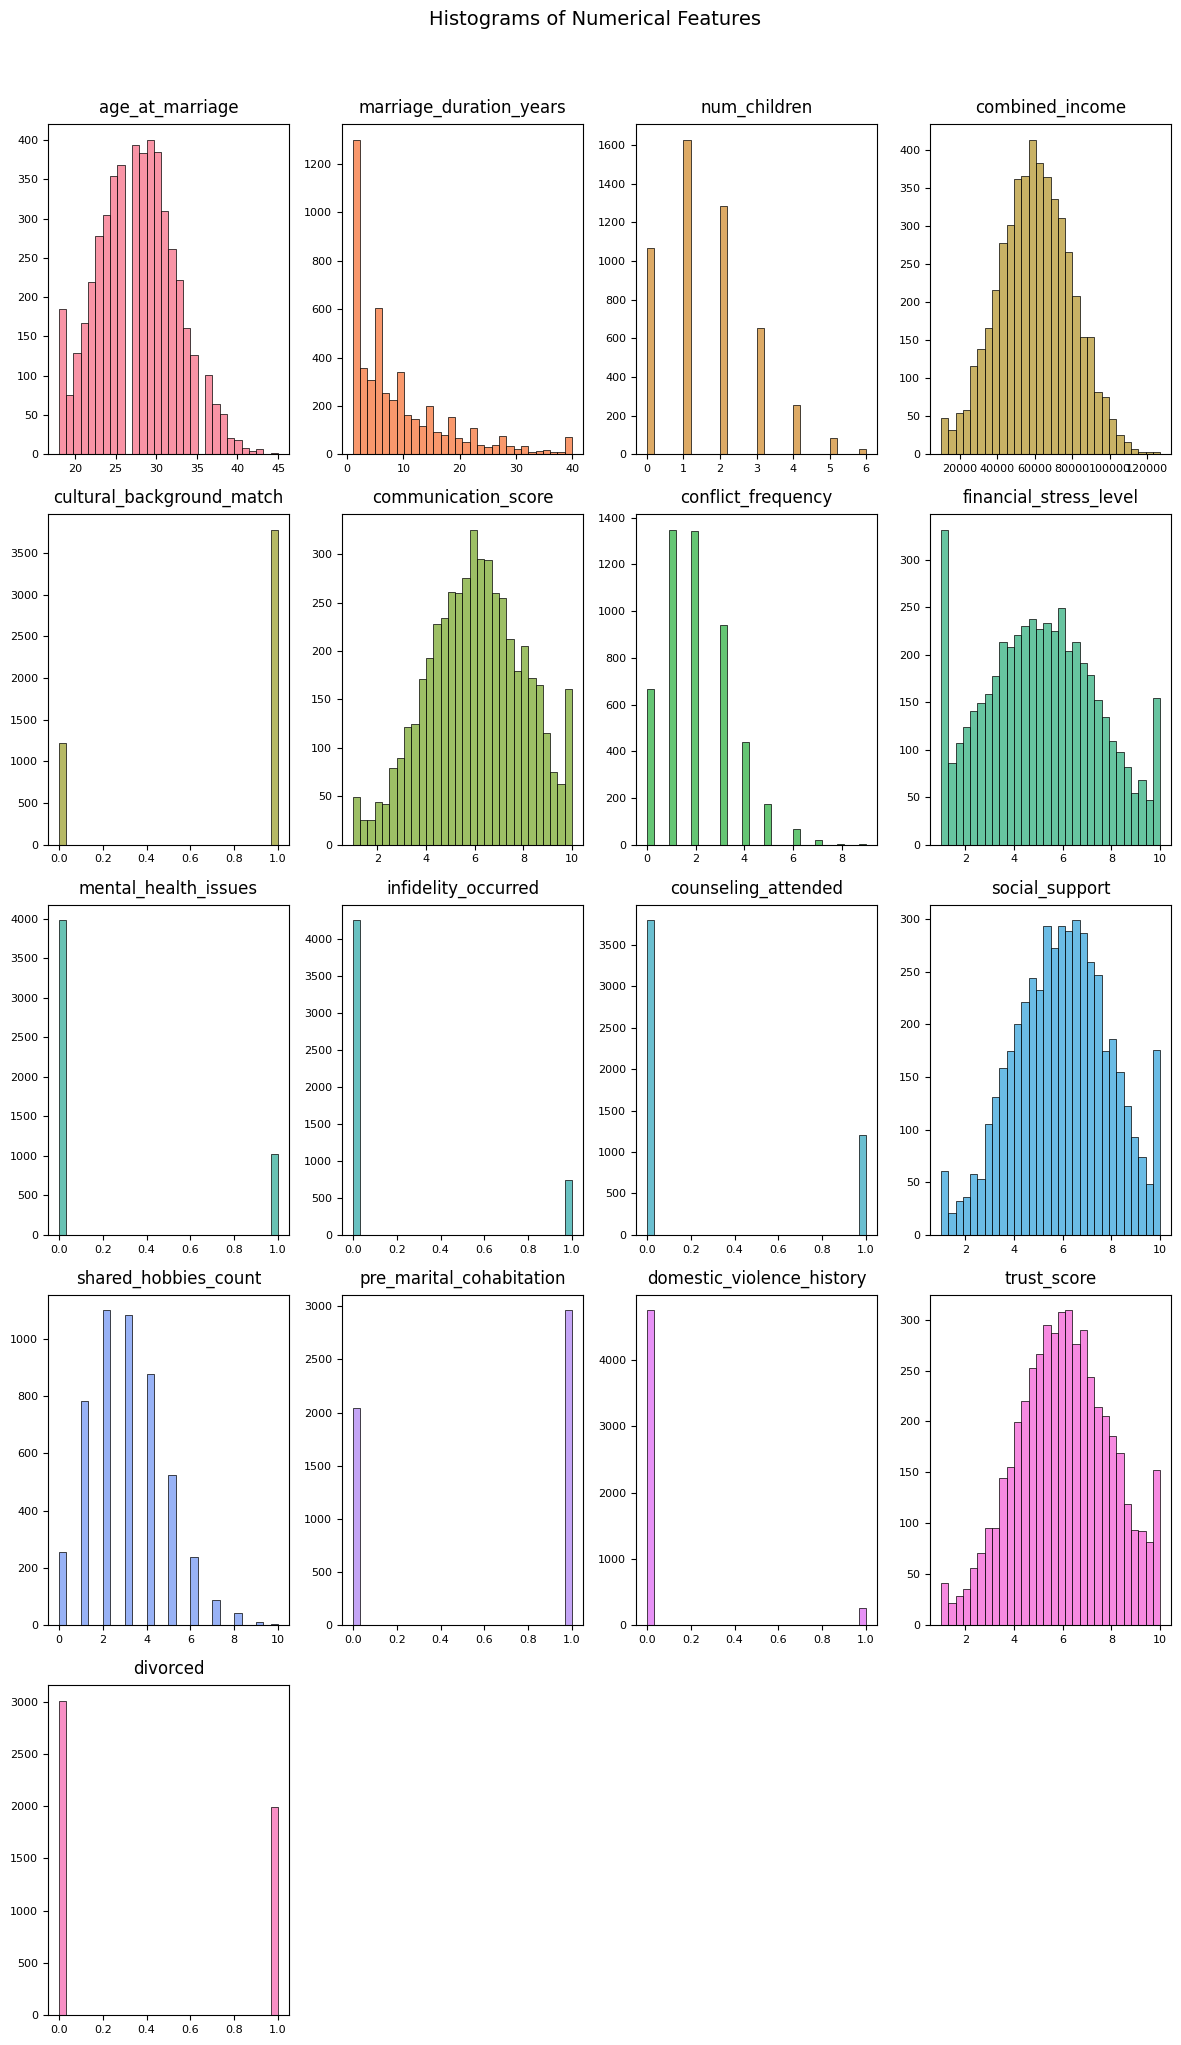

In [7]:
# Numerical features
numerical_features = divorce_df.select_dtypes(include=['float64', 'int64']).columns

# Determine number of rows and columns for the grid
num_features = len(numerical_features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

# Set a custom color palette
colors = sns.color_palette("husl", n_colors=num_features)

# Create subplots with a smaller figure size to reduce rendering time
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows), facecolor='white')
axes = axes.flatten()

# Optimize histogram plotting
for i, feature in enumerate(numerical_features):
    # Use a subset of data
    data = divorce_df[feature] #.dropna()  # Drop NaNs upfront
    sns.histplot(data=data, bins=30, ax=axes[i], kde=False, color=colors[i],
                 edgecolor='black', linewidth=0.5, stat='count')
    axes[i].set_title(f'{feature}', fontsize=12, pad=8)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='both', labelsize=8)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Minimize layout adjustments
plt.suptitle('Histograms of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

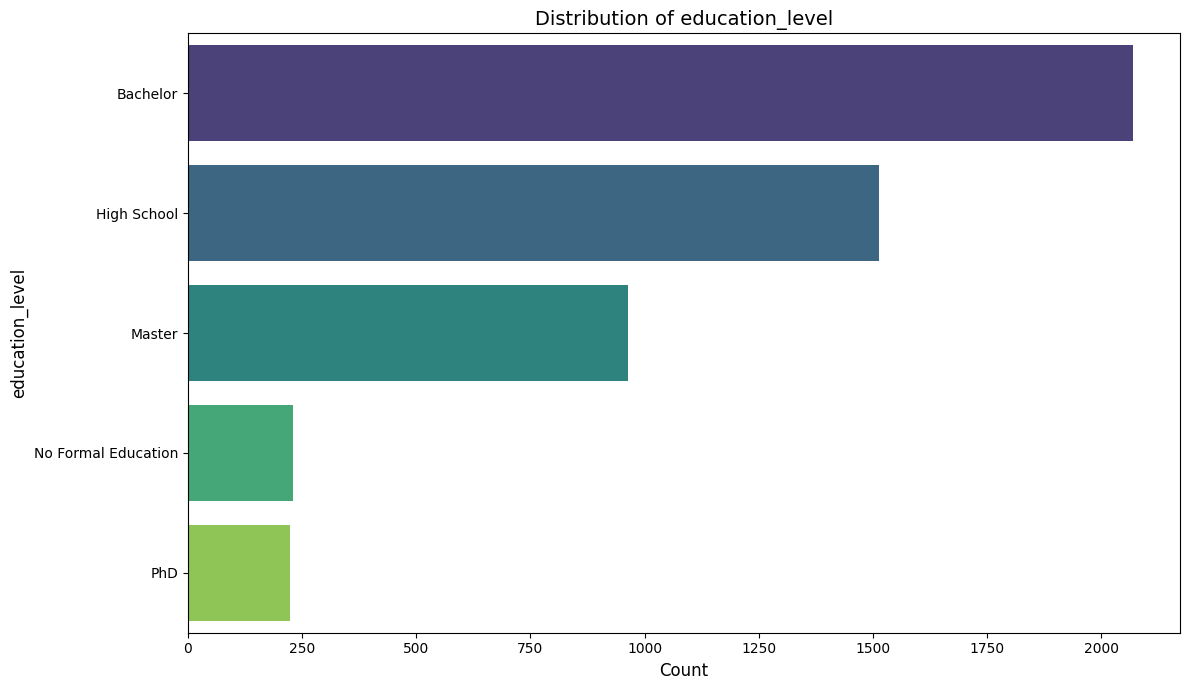

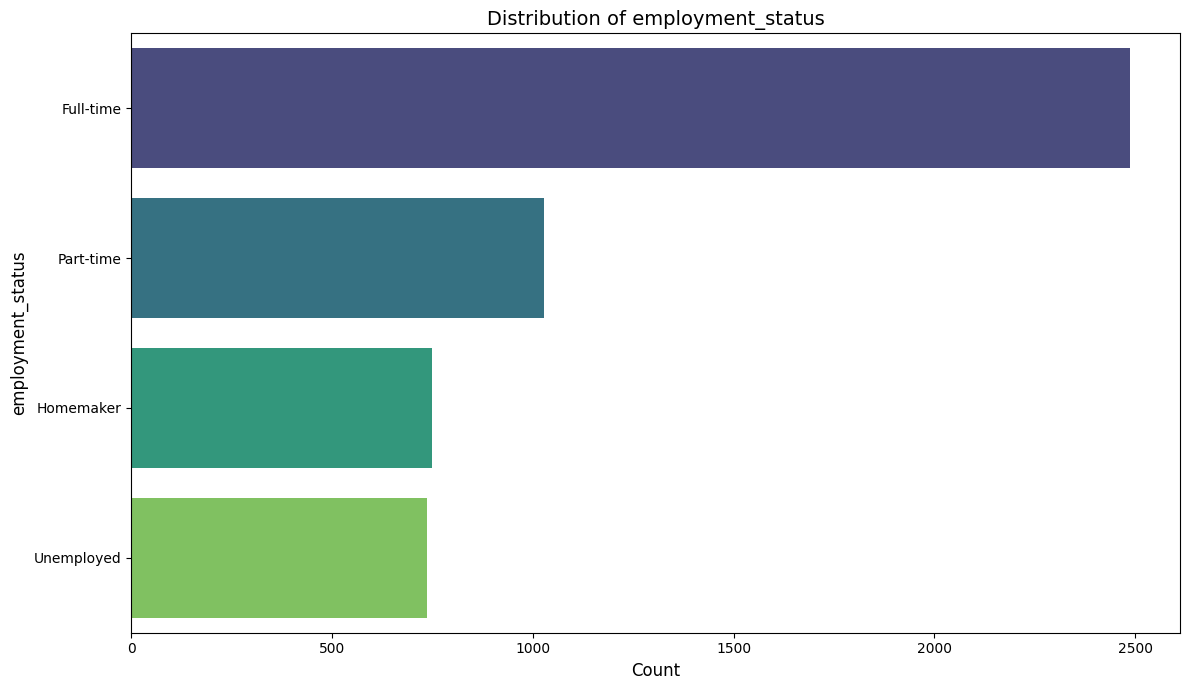

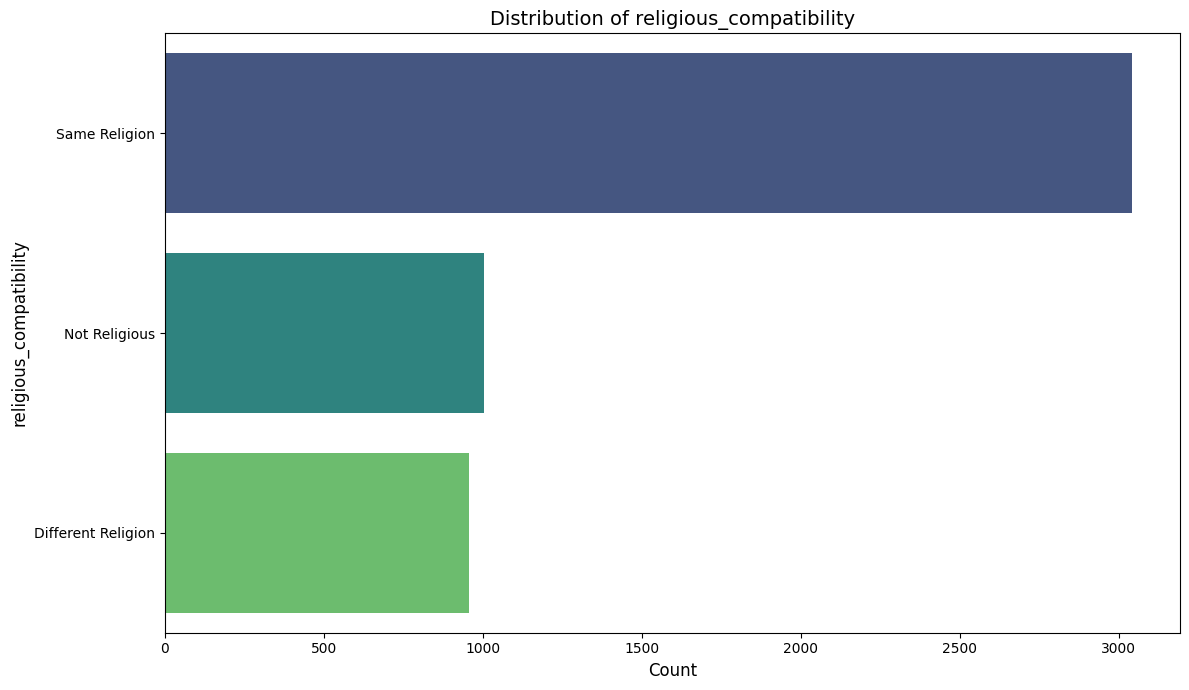

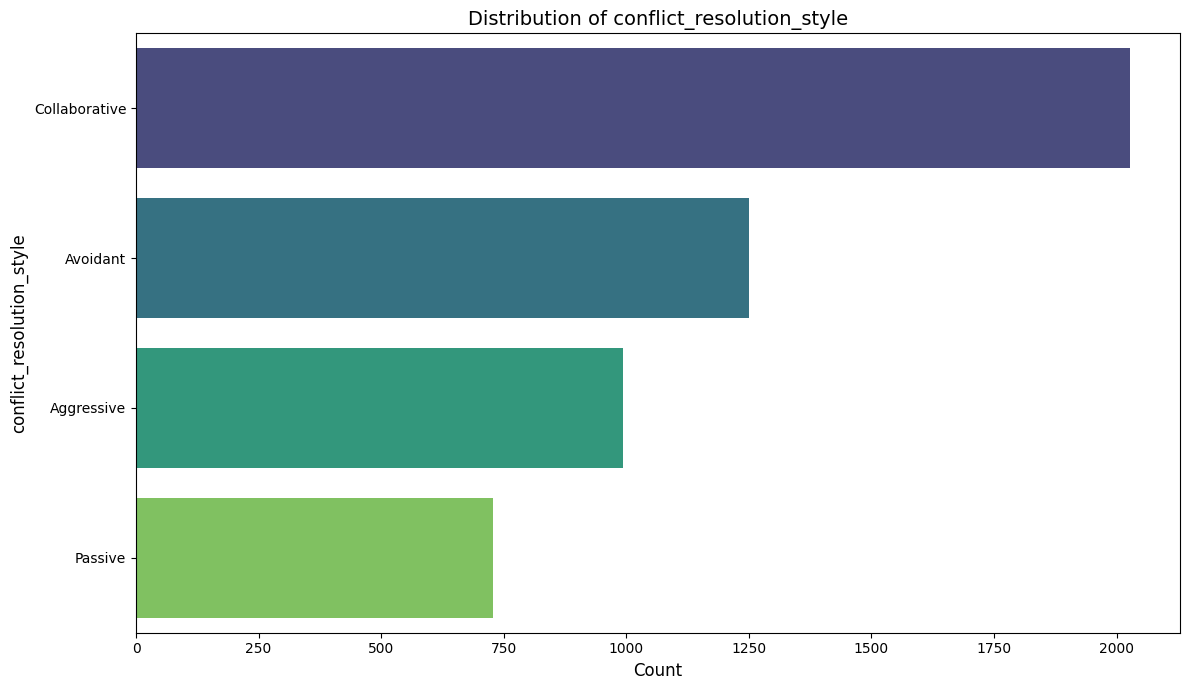

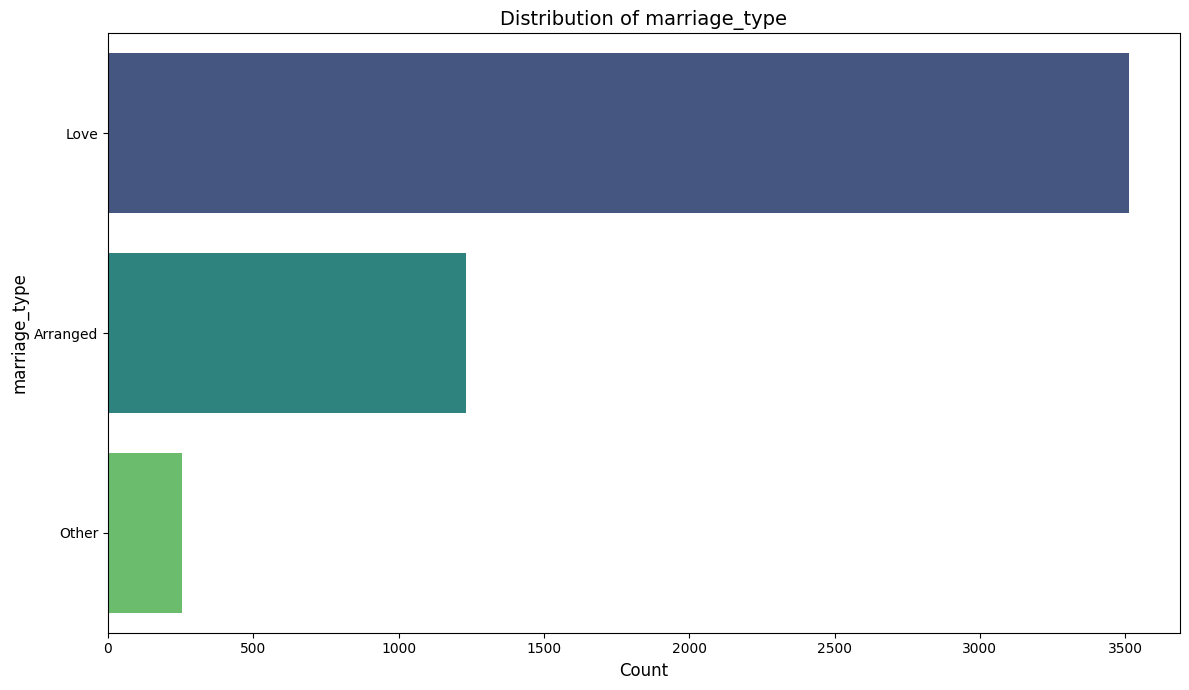

In [8]:
categorical_cols = divorce_df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(12, 7)) # Increased figure size
    sns.countplot(data=divorce_df, y=col, order=divorce_df[col].value_counts().index, palette='viridis') # Added palette
    plt.title(f'Distribution of {col}', fontsize=14) # Increased title fontsize
    plt.xlabel('Count', fontsize=12) # Increased xlabel fontsize
    plt.ylabel(col, fontsize=12) # Increased ylabel fontsize
    plt.xticks(fontsize=10) # Increased xticks fontsize
    plt.yticks(fontsize=10) # Increased yticks fontsize
    plt.tight_layout() # Adjust layout
    plt.show()

## Create new features


In [9]:
# a feature based on age at marriage quartiles as a proxy for different age groups.
divorce_df['age_at_marriage_quartile'] = pd.qcut(divorce_df['age_at_marriage'], 4, labels=False)


# indicate whether the marriage duration is short (e.g., less than 5 years).
divorce_df['short_marriage_duration'] = (divorce_df['marriage_duration_years'] < 5).astype(int)

# interaction between `num_children` and `marriage_duration_years`.
divorce_df['children_x_duration'] = divorce_df['num_children'] * divorce_df['marriage_duration_years']

# a new feature for the ratio of `communication_score` to `conflict_frequency`.
# Add a small constant to conflict_frequency to avoid division by zero
divorce_df['communication_to_conflict_ratio'] = divorce_df['communication_score'] / (divorce_df['conflict_frequency'] + 1e-6)

# a feature indicating high financial stress (e.g., above a certain threshold).
# Use the 75th percentile as a threshold for high financial stress.
high_stress_threshold = divorce_df['financial_stress_level'].quantile(0.75)
divorce_df['high_financial_stress'] = (divorce_df['financial_stress_level'] > high_stress_threshold).astype(int)

# interaction between `trust_score` and `social_support`.
divorce_df['trust_x_social_support'] = divorce_df['trust_score'] * divorce_df['social_support']

# history of both `mental_health_issues` and `domestic_violence_history`.
divorce_df['health_issues_and_domestic_violence'] = (divorce_df['mental_health_issues'] * divorce_df['domestic_violence_history']).astype(int)

# combining `infidelity_occurred` and `counseling_attended` (e.g., indicating infidelity despite counseling).
divorce_df['infidelity_despite_counseling'] = (divorce_df['infidelity_occurred'] * divorce_df['counseling_attended']).astype(int)

# difference between `trust_score` and `financial_stress_level`.
divorce_df['trust_minus_financial_stress'] = divorce_df['trust_score'] - divorce_df['financial_stress_level']

divorce_df.head()

,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,divorced,age_at_marriage_quartile,short_marriage_duration,children_x_duration,communication_to_conflict_ratio,high_financial_stress,trust_x_social_support,health_issues_and_domestic_violence,infidelity_despite_counseling,trust_minus_financial_stress
0,30,1,1,Bachelor,Full-time,64001,Different Religion,1,5.536016,3,...,1,2,1,1,1.845338,0,52.780745,0,0,0.236055
1,27,2,2,Master,Full-time,86221,Same Religion,1,5.810172,3,...,1,1,1,4,1.936723,0,35.858921,0,0,5.769384
2,31,6,0,High School,Part-time,69441,Same Religion,0,6.088146,3,...,1,2,0,0,2.029381,0,32.572350,0,0,2.333591
3,35,3,2,Bachelor,Full-time,69513,Not Religious,1,6.212046,3,...,0,3,1,6,2.070681,0,18.376460,0,0,-1.402369
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,1,4.826262,1,...,1,1,1,4,4.826257,1,57.712592,0,0,0.568846


## Preprocess data


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Identify categorical and numerical columns
categorical_features = divorce_df.select_dtypes(include='object').columns
numerical_features = divorce_df.select_dtypes(include=['int64', 'float64']).columns

# Exclude the target variable 'divorced' from the features
numerical_features = numerical_features.drop('divorced', errors='ignore')  # errors='ignore' in case 'divorced' isn't in numerical_features

# Apply one-hot encoding to categorical columns and scale numerical features
# Create a ColumnTransformer to apply transformations only to specified columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'  # Drop any columns not specified (e.g., 'divorced')
)

# Apply the preprocessing
preprocessed_data = preprocessor.fit_transform(divorce_df)

# Get the names of the one-hot encoded features
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine numerical and one-hot encoded feature names
all_feature_names = list(numerical_features) + list(onehot_feature_names)

# Convert the preprocessed data into a DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_feature_names)

# Separate the features (X) and the target variable (y)
X = preprocessed_df  # No need to drop 'divorced' since it's not included
y = divorce_df['divorced'].values

# Display the results
#display(X.head())
#display(y[:5])

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features (X) and target (y) before preprocessing
X_data = divorce_df.drop('divorced', axis=1)
y = divorce_df['divorced']

# Identify categorical and numerical columns in the features (X_data)
categorical_features = X_data.select_dtypes(include='object').columns
numerical_features = X_data.select_dtypes(include=['int64', 'float64']).columns

# one-hot encoding for categorical columns and scale numerical features
# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # This will now only pass through columns not in numerical or categorical
)

# Apply the preprocessing
preprocessed_data = preprocessor.fit_transform(X_data)

# Get the names of the one-hot encoded features
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine numerical and one-hot encoded feature names
all_feature_names = list(numerical_features) + list(onehot_feature_names)

# Concatenate the scaled numerical features and the one-hot encoded categorical features into a single DataFrame
X = pd.DataFrame(preprocessed_data, columns=all_feature_names)

display(X.head())
display(y.head())

,age_at_marriage,marriage_duration_years,num_children,combined_income,cultural_background_match,communication_score,conflict_frequency,financial_stress_level,mental_health_issues,infidelity_occurred,...,religious_compatibility_Different Religion,religious_compatibility_Not Religious,religious_compatibility_Same Religion,conflict_resolution_style_Aggressive,conflict_resolution_style_Avoidant,conflict_resolution_style_Collaborative,conflict_resolution_style_Passive,marriage_type_Arranged,marriage_type_Love,marriage_type_Other
0,0.497663,-0.923550,-0.443161,0.192314,0.569036,-0.256980,0.702445,0.410520,-0.505931,-0.418435,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.120194,-0.810522,0.358505,1.322521,0.569036,-0.117329,0.702445,-1.750341,-0.505931,2.389856,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.703615,-0.358411,-1.244827,0.469017,-1.757358,0.024267,0.702445,-0.804859,-0.505931,-0.418435,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.527425,-0.697495,0.358505,0.472679,0.569036,0.087379,0.702445,-0.076445,-0.505931,-0.418435,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.326146,-0.810522,0.358505,0.191551,0.569036,-0.618518,-0.713775,1.874263,-0.505931,-0.418435,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


,divorced
0,1
1,1
2,1
3,0
4,1


## Train a classification model


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the preprocessed data (X) and the target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import and instantiate a classification model (LogisticRegression)
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model (optional, but good practice to see performance)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73       593
           1       0.56      0.21      0.30       407

    accuracy                           0.61      1000
   macro avg       0.59      0.55      0.52      1000
weighted avg       0.60      0.61      0.56      1000



## Evaluate model performance
compare the performance with and without the new features.


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics for the model with new features
accuracy_with_new_features = accuracy_score(y_test, y_pred)
precision_with_new_features = precision_score(y_test, y_pred)
recall_with_new_features = recall_score(y_test, y_pred)
f1_with_new_features = f1_score(y_test, y_pred)
roc_auc_with_new_features = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Metrics with new features:")
print(f"Accuracy: {accuracy_with_new_features}")
print(f"Precision: {precision_with_new_features}")
print(f"Recall: {recall_with_new_features}")
print(f"F1-score: {f1_with_new_features}")
print(f"ROC AUC: {roc_auc_with_new_features}")

Metrics with new features:
Accuracy: 0.612
Precision: 0.5629139072847682
Recall: 0.20884520884520885
F1-score: 0.3046594982078853
ROC AUC: 0.5965336791643705


### Train with original features
Create a new feature set containing only the original columns, preprocess it, split it into training and testing sets, train a new model on this data, make predictions, and calculate evaluation metrics for comparison.



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a new feature set X_original with only the original columns
original_columns = [
    'age_at_marriage', 'marriage_duration_years', 'num_children',
    'education_level', 'employment_status', 'combined_income',
    'religious_compatibility', 'cultural_background_match', 'communication_score',
    'conflict_frequency', 'conflict_resolution_style', 'financial_stress_level',
    'mental_health_issues', 'infidelity_occurred', 'counseling_attended',
    'social_support', 'shared_hobbies_count', 'marriage_type',
    'pre_marital_cohabitation', 'domestic_violence_history', 'trust_score'
]
X_original_data = divorce_df[original_columns].copy()
y_original = divorce_df['divorced'].copy()


# Identify categorical and numerical columns in the original features
categorical_features_original = X_original_data.select_dtypes(include='object').columns
numerical_features_original = X_original_data.select_dtypes(include=['int64', 'float64']).columns

# Apply the same preprocessing steps as before, but only to original features
preprocessor_original = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_original),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_original)
    ],
    remainder='passthrough'
)

X_original_processed = preprocessor_original.fit_transform(X_original_data)

# Get the names of the one-hot encoded features for original data
onehot_feature_names_original = preprocessor_original.named_transformers_['cat'].get_feature_names_out(categorical_features_original)

# Combine numerical and one-hot encoded feature names for original data
all_feature_names_original = list(numerical_features_original) + list(onehot_feature_names_original)

X_original = pd.DataFrame(X_original_processed, columns=all_feature_names_original)


# Split X_original and y_original into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

#  Train a new instance of the classification model on original features
model_original = LogisticRegression(random_state=42)
model_original.fit(X_train_original, y_train_original)

#  Make predictions on X_test_original
y_pred_original = model_original.predict(X_test_original)

# Calculate evaluation metrics for the model with original features
accuracy_original = accuracy_score(y_test_original, y_pred_original)
precision_original = precision_score(y_test_original, y_pred_original)
recall_original = recall_score(y_test_original, y_pred_original)
f1_original = f1_score(y_test_original, y_pred_original)
roc_auc_original = roc_auc_score(y_test_original, model_original.predict_proba(X_test_original)[:, 1])


print("\nMetrics with original features:")
print(f"Accuracy: {accuracy_original}")
print(f"Precision: {precision_original}")
print(f"Recall: {recall_original}")
print(f"F1-score: {f1_original}")
print(f"ROC AUC: {roc_auc_original}")

# Compare the metrics
print("\nComparison:")
print(f"Accuracy (New Features vs Original): {accuracy_with_new_features:.4f} vs {accuracy_original:.4f}")
print(f"Precision (New Features vs Original): {precision_with_new_features:.4f} vs {precision_original:.4f}")
print(f"Recall (New Features vs Original): {recall_with_new_features:.4f} vs {recall_original:.4f}")
print(f"F1-score (New Features vs Original): {f1_with_new_features:.4f} vs {f1_original:.4f}")
print(f"ROC AUC (New Features vs Original): {roc_auc_with_new_features:.4f} vs {roc_auc_original:.4f}")


Metrics with original features:
Accuracy: 0.601
Precision: 0.5303030303030303
Recall: 0.171990171990172
F1-score: 0.2597402597402597
ROC AUC: 0.6046836350377666

Comparison:
Accuracy (New Features vs Original): 0.6120 vs 0.6010
Precision (New Features vs Original): 0.5629 vs 0.5303
Recall (New Features vs Original): 0.2088 vs 0.1720
F1-score (New Features vs Original): 0.3047 vs 0.2597
ROC AUC (New Features vs Original): 0.5965 vs 0.6047


## Summary:

### Data Analysis Key Findings
*   Nine new features were created from the existing columns, including age at marriage quartile, short marriage duration, interaction terms, ratios, and stress indicators.
*   The data was successfully preprocessed by separating features and target variable, one-hot encoding categorical columns, and scaling numerical features.
*   A Logistic Regression model trained with the new features achieved an accuracy of 0.6120, a precision of 0.5629, a recall of 0.2088, and an F1-score of 0.3047 on the test data.
*   A Logistic Regression model trained only with original features achieved an accuracy of 0.6010, a precision of 0.5303, a recall of 0.1720, and an F1-score of 0.2597 on the test data.
*   The model trained with new features showed a modest improvement in Accuracy, Precision, Recall, and F1-score compared to the model trained with original features.

### Insights or Next Steps
*   The newly engineered features appear to contribute positively to the model's predictive performance, suggesting that these features capture additional relevant information for predicting divorce.
*   Further exploration with other classification algorithms and hyperparameter tuning could potentially yield even better performance with the enhanced feature set.


what other features can i add that will be